#### Importing libraries and reading data set

In [26]:
# Importi required libraries
%matplotlib inline
from sklearn import tree, neighbors, datasets, linear_model
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import cross_validate,GridSearchCV
from sklearn import metrics, linear_model
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Creating a dataframe by combining names and data
v1=["mean","sd","worst"]
v2 = ['radius','texture','perimeter','area','smoothness','compactness',
            'concavity','concave_points','symmertry','fractal_dimension']
features = [i+"_"+j for i in v2 for j in v1]
column_names = ["Diagnosis"]+ features

# Read data set into pandas dataframe
data = pd.read_csv("wdbc.data",names=column_names)
print("Dimension",data.shape)
data.head(3)

Dimension (569, 31)


,Diagnosis,radius_mean,radius_sd,radius_worst,texture_mean,texture_sd,texture_worst,perimeter_mean,perimeter_sd,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd,concave_points_worst,symmertry_mean,symmertry_sd,symmertry_worst,fractal_dimension_mean,fractal_dimension_sd,fractal_dimension_worst
842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


#### Data split and Model Fitting

In [27]:
# Split dataset into 80-20 using train_test_split function
train_data, test_data = train_test_split(data,
                                         test_size=0.20,
                                         random_state=103)
print("Train",train_data.shape)
print("Test",test_data.shape)

# Create variables for subsetting data set
target = 'Diagnosis'
predictors = features

# Create mode_fit function for decision tree, knn and logistic regression
# Perform a cross validation and gives accuracy on training data

def model_fit(alg,train,test,predictors,target,feature_imp):
    #fit model
    alg.fit(train[predictors],train[target])
    
    
    #alg.fit(train[predictors],train[target])
    #prediction
    train_predictions=alg.predict(train[predictors])
    train_pred_prob=alg.predict_proba(train[predictors])[:,1]
    
    #print report
    print("Training Accuracy: ",round(metrics.accuracy_score(
        train[target].values,train_predictions),2))
    
    # Used to identify the most important feature
    if feature_imp==1:
        feat_imp=pd.Series(alg.feature_importances_,
                           predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar',title='Feature Importance')
        plt.ylabel('Feature Importance Score')
        
    # Predict using testing dataset
    test['Diagnosis_pred']=alg.predict(test[predictors])
    test['Diagnosis_pred_proba']=alg.predict_proba(test[predictors])[:,1]
    
    # Calculate accuracy score on predicted values
    test_accuracy = alg.score(test[predictors], test[target])
    print("Testing Accuracy: ", round(test_accuracy,2))
    
    print("ROC-AUC: ", round(metrics.roc_auc_score(
        test[target].values,test['Diagnosis_pred_proba'].values),2))
    
    print("Classification Report:")
    print(metrics.classification_report(test[target].values,
                                        test['Diagnosis_pred'].values))
    
    print("Confusion Matrix: ")
    print(pd.DataFrame(metrics.confusion_matrix(test[target].values,
                                    test['Diagnosis_pred'].values)))
    print("Labels: M - 1 | B - 0")

Train (455, 31)
Test (114, 31)


#### Method1: Decision Tree classifier

Decision Boundary Visualization

In [28]:
# Plot the decision surface of a decision tree
plot_colors = "bry"
plot_step = 0.02  # step size in the mesh
X = data[['concave_points_sd','fractal_dimension_worst']] # We only take the two corresponding features
y = data['Diagnosis']
n_classes = len(set(y))

# Train
clf = tree.DecisionTreeClassifier().fit(X, y)

# Plot the decision boundary. 
# For that, we will assign a color to each point in the mesh [x_min, m_max]x[y_min, y_max].   
x_min, x_max = X['concave_points_sd'].min() - .5,X['concave_points_sd'].max() + .5
y_min, y_max = X['fractal_dimension_worst'].min() - .5,X['fractal_dimension_worst'].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))


Depth of tree of hyper parameter

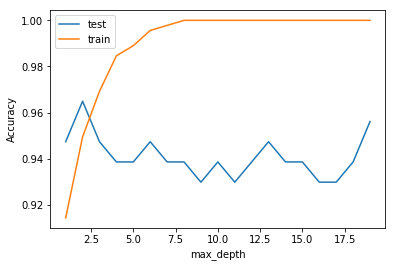

In [29]:
complexity_values = range(1,20)
train_accuracies = []
test_accuracies=[]
for complexity_value in complexity_values:
    clf = tree.DecisionTreeClassifier(criterion="gini",
                                      max_depth=complexity_value)
    test_accuracies.append(clf.fit(train_data[predictors],
        train_data[target]).score(test_data[predictors],
                                  test_data[target]))
    
    train_accuracies.append(clf.fit(train_data[predictors],
        train_data[target]).score(train_data[predictors],
                                  train_data[target]))
    
# We want to plot our results
line1, =plt.plot(complexity_values, test_accuracies,
                 label='test_accuracies')
line2, =plt.plot(complexity_values, train_accuracies,
                 label='train_accuracies')
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend((line1, line2), ('test', 'train'))
plt.show()

Paramater tuning using grid search

In [30]:
param_test={'max_depth':list(range(1,20,1)),
            'criterion':('gini','entropy')}
f1_scorer = metrics.make_scorer(metrics.f1_score, pos_label="M")
gsearch=GridSearchCV(estimator=tree.DecisionTreeClassifier(random_state=10),
                      param_grid=param_test,
                      scoring=f1_scorer,
                      n_jobs=4,
                      iid=True,
                      cv=10)
gsearch.fit(train_data[predictors],train_data[target])
print("Best obtained Score:",gsearch.best_score_)
print("Best obtained parameters:",gsearch.best_params_)

Best obtained Score: 0.919929327176315
Best obtained parameters: {'criterion': 'entropy', 'max_depth': 4}


Final model after tuning

Final decision tree model 

Training Accuracy:  0.99
Testing Accuracy:  0.94
ROC-AUC:  0.93
Classification Report:
              precision    recall  f1-score   support

           B       0.94      0.96      0.95        69
           M       0.93      0.91      0.92        45

   micro avg       0.94      0.94      0.94       114
   macro avg       0.94      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114

Confusion Matrix: 
    0   1
0  66   3
1   4  41
Labels: M - 1 | B - 0


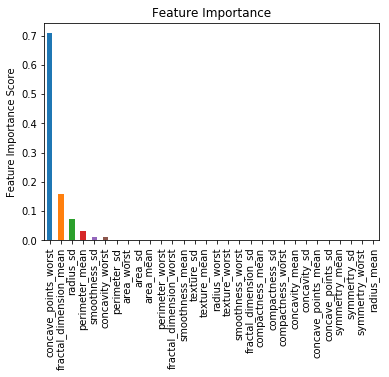

In [31]:
decision_tree_model=tree.DecisionTreeClassifier(criterion="gini",
                                                max_depth=4,
                                               min_impurity_decrease=0.005)
print('Final decision tree model \n')
model_fit(decision_tree_model,train_data,test_data,predictors,target,1)

#### Method 3: KNN Classifier

Visualization of the decision boundaries for multiple k values

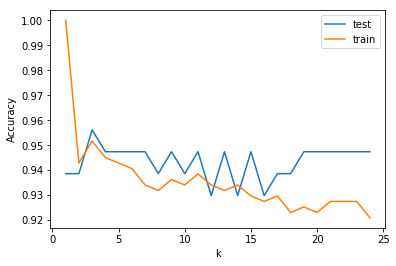

In [49]:
test_accuracies = []
train_accuracies= []
k_range = list(range(1, 25, 1))
accuracy_metric = metrics.make_scorer(metrics.accuracy_score)#, pos_label="M")
for k in k_range:
    model = neighbors.KNeighborsClassifier(n_neighbors=k)
    model.fit(train_data[predictors],train_data[target])
    error_test = model.score(test_data[predictors], test_data[target])
    error_train = model.score(train_data[predictors], train_data[target])
    test_accuracies.append(error_test)
    train_accuracies.append(error_train)


line1, =plt.plot(k_range, test_accuracies,label='test_accuracies')
line2, =plt.plot(k_range, train_accuracies,  label='train_accuracies')

plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend((line1, line2), ('test', 'train'))
plt.show()
# plot misclassification error vs k
#plt.plot(k_range, test_scores)
#plt.xlabel("Number of Neighbors K")
#plt.ylabel("Misclassification Error")
#plt.show()

Paramater tuning using grid search

In [34]:
param_test ={'n_neighbors':list(range(1,20)),
             'weights':('uniform','distance')}

f1_scorer = metrics.make_scorer(metrics.f1_score, pos_label="M")
gsearch=GridSearchCV(estimator=neighbors.KNeighborsClassifier(),
                      param_grid=param_test,
                      scoring=f1_scorer,
                      n_jobs=4,
                      iid=True,
                      cv=10)
gsearch.fit(train_data[predictors],train_data[target])
print("Best Score:",gsearch.best_score_)
print("Best parameters:",gsearch.best_params_)

Best Score: 0.9061236439990611
Best parameters: {'n_neighbors': 9, 'weights': 'distance'}


Final model after tuning

In [35]:
knn=neighbors.KNeighborsClassifier(n_neighbors=5,weights='uniform')
print("KNN model with 5 neighbors\n")
model_fit(knn,train_data,test_data,predictors,target,0)

KNN model with 5 neighbors

Training Accuracy:  0.94
Testing Accuracy:  0.95
ROC-AUC:  0.98
Classification Report:
              precision    recall  f1-score   support

           B       0.93      0.99      0.96        69
           M       0.98      0.89      0.93        45

   micro avg       0.95      0.95      0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Confusion Matrix: 
    0   1
0  68   1
1   5  40
Labels: M - 1 | B - 0


#### Method3: Logistic Regression

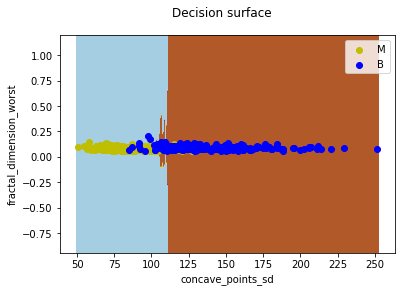

In [59]:

plot_colors = "ybg"
plot_step = 0.02  # step size in the mesh
# We only take the two corresponding features
X = data[['concave_points_sd','fractal_dimension_worst']]
y = data['Diagnosis']
n_classes = len(set(y))

# we train again model with two variables to visualize decision boundaries
clf = clf.fit(X, y) 

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].   
x_min, x_max = X['concave_points_sd'].min() - 1, X['concave_points_sd'].max() + 1
y_min, y_max = X['fractal_dimension_worst'].min() - 1, X['fractal_dimension_worst'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z[Z=="M"] = 1
Z[Z=="B"] = 0
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

plt.xlabel('concave_points_sd')
plt.ylabel('fractal_dimension_worst')
plt.axis("tight")

# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    if i== 0:
        val="B"
    else:
        val="M"
    #idx = np.where(y == val)
    plt.scatter(X[y==val]["concave_points_sd"].values,
                X[y==val]["fractal_dimension_worst"].values,
                c=color, label=["M","B"][i],
                cmap=plt.cm.Paired)

plt.axis("tight")
plt.suptitle("Decision surface")
plt.legend()
plt.show()

Paramater tuning using grid search

In [37]:
param_test ={'C':[0.001, 0.01, 0.1, 1, 10, 100],
             'penalty':('l1','l2')}

lr=linear_model.LogisticRegression(random_state=10,multi_class='ovr')
f1_scorer = metrics.make_scorer(metrics.f1_score, pos_label="M")
gsearch=GridSearchCV(estimator=lr,
                      param_grid=param_test,
                      scoring=f1_scorer,
                      n_jobs=4,
                      iid=True,
                      cv=10)
gsearch.fit(train_data[predictors],train_data[target])
print("Best Score:",gsearch.best_score_)
print("Best parameters:",gsearch.best_params_)

Best Score: 0.9500862220217059
Best parameters: {'C': 100, 'penalty': 'l1'}


Final model after tuning

In [38]:
logistic_regression = linear_model.LogisticRegression(C=10,penalty='l1',multi_class='ovr')
model_fit(logistic_regression,train_data,test_data,predictors,target,0)

Training Accuracy:  0.98
Testing Accuracy:  0.96
ROC-AUC:  1.0
Classification Report:
              precision    recall  f1-score   support

           B       0.99      0.96      0.97        69
           M       0.94      0.98      0.96        45

   micro avg       0.96      0.96      0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114

Confusion Matrix: 
    0   1
0  66   3
1   1  44
Labels: M - 1 | B - 0
